In [26]:
#Se cargan las bibliotecas necesarias 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage. feature import hog
import matplotlib.image as mpimg

from sklearn import svm
import numpy as np
import joblib
from skimage.feature import hog
from sklearn.utils import shuffle
import sys
import argparse
import random


In [2]:
import glob

pedestrian = glob.glob("data_svm/Pedestrian/*.png")
no_pedestrian= glob.glob("data_svm/nonPedestrian/*.png")

In [3]:
len(pedestrian)


902

In [4]:
len(no_pedestrian)

1212

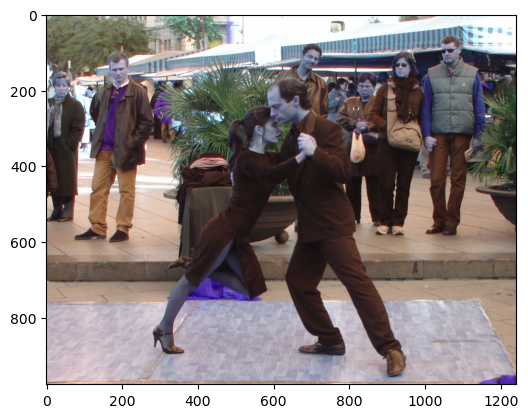

In [5]:
#Se muestra imagen con un peaton
img_color= cv2.imread(pedestrian[1])
plt.imshow(img_color)

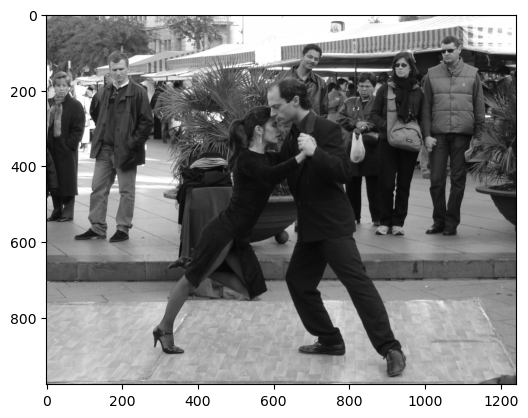

In [9]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap ="gray")

In [37]:
def crop_centre(img):
    h, w, _ = img.shape
    l = int((w - 64)/2)
    t = int((h - 128)/2)

    crop = img[t:t+128, l:l+64]
    return crop

In [41]:
cropped = crop_centre(img_color)
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
features,hog_img = hog(gray, orientations=11, 
                       pixels_per_cell= (16,16),
                       cells_per_block=(2,2),
                       transform_sqrt= False,
                       visualize = True,
                       feature_vector= True)

In [42]:
features.shape

(924,)

In [43]:
hog_img.shape

(128, 64)

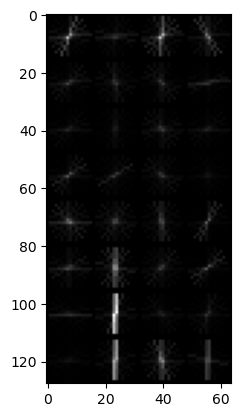

In [44]:
plt.imshow(hog_img,cmap ="gray")

In [45]:
pedestrian_hog_accum = []

for i  in pedestrian:
    img_color = mpimg.imread(i)
    cropped = crop_centre(img_color)
    img_gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

    pedestrian_hog_feature  = hog(img_gray,
                                orientations =11,
                                pixels_per_cell= (16,16),
                                cells_per_block=(2,2),
                                transform_sqrt= False,
                                visualize = False,
                                feature_vector= True)
    pedestrian_hog_accum. append (pedestrian_hog_feature)

In [71]:
X_pedestrian = np.vstack(pedestrian_hog_accum).astype(np.float64)
Y_pedestrian = np.ones(len(X_pedestrian))

In [72]:
X_pedestrian.shape

(902, 924)

In [73]:
Y_pedestrian.shape

(902,)

In [49]:
nopedestrian_hog_accum = []

for i  in no_pedestrian:
    img_color = mpimg.imread(i)
    cropped = crop_centre(img_color)
    img_gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

    nopedestrian_hog_feature  = hog(img_gray,
                                orientations =11,
                                pixels_per_cell= (16,16),
                                cells_per_block=(2,2),
                                transform_sqrt= False,
                                visualize = False,
                                feature_vector= True)

    nopedestrian_hog_accum. append (nopedestrian_hog_feature)

In [70]:
X_nopedestrian = np.vstack(nopedestrian_hog_accum).astype(np.float64)
Y_nopedestrian = np.zeros(len(X_nopedestrian))

In [74]:
X_nopedestrian.shape

(1212, 924)

In [75]:
Y_nopedestrian.shape

(1212,)

In [76]:
X = np.vstack((X_pedestrian,X_nopedestrian))
X.shape

(2114, 924)

In [77]:
Y = np.vstack((Y_pedestrian,Y_nopedestrian))
Y.shape

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 902 and the array at index 1 has size 1212

In [ ]:
#Se generan los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.svm import SVC

svc_model= SVC()
svc_model.fit(X_train, y_train)

In [ ]:
y_predict = svc_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap (cm, annot= True , fmt= "d")

In [ ]:
print (classification_report(y_test, y_predict))

In [ ]:
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel':['rbf']}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid= GridSearchCV(SVC(),param_grid,refit= True,verbose =4)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt= "d")

In [ ]:
print(classification_report(y_test,grid_predictions))